In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [2]:
trainpath='D://Level_3//Second_Term//Selected_2//datasets//dataset_2//Face Images//'
testpath='D://Level_3//Second_Term//Selected_2//datasets//dataset_2//Face Images//'

In [4]:
for folder in  os.listdir(trainpath + 'Final Training Images') : 
    files = gb.glob(pathname= str( trainpath +'Final Training Images//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 0 in folder .DS_Store
For training data , found 15 in folder face1
For training data , found 20 in folder face10
For training data , found 16 in folder face11
For training data , found 14 in folder face12
For training data , found 13 in folder face13
For training data , found 12 in folder face14
For training data , found 15 in folder face15
For training data , found 17 in folder face16
For training data , found 15 in folder face2
For training data , found 14 in folder face3
For training data , found 17 in folder face4
For training data , found 16 in folder face5
For training data , found 16 in folder face6
For training data , found 14 in folder face7
For training data , found 14 in folder face8
For training data , found 16 in folder face9


In [5]:
for folder in  os.listdir(testpath + 'Final Testing Images') : 
    files = gb.glob(pathname= str( testpath +'Final Testing Images//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 0 in folder .DS_Store
For training data , found 4 in folder face1
For training data , found 4 in folder face10
For training data , found 4 in folder face11
For training data , found 4 in folder face12
For training data , found 4 in folder face13
For training data , found 4 in folder face14
For training data , found 4 in folder face15
For training data , found 4 in folder face16
For training data , found 4 in folder face2
For training data , found 4 in folder face3
For training data , found 4 in folder face4
For training data , found 4 in folder face5
For training data , found 4 in folder face6
For training data , found 4 in folder face7
For training data , found 4 in folder face8
For training data , found 4 in folder face9


In [7]:
size = []
for folder in  os.listdir(trainpath + 'Final Training Images') : 
    files = gb.glob(pathname= str( trainpath +'Final Training Images//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() # num of same values

(311, 311, 3)    9
(316, 316, 3)    8
(323, 323, 3)    8
(313, 313, 3)    8
(326, 326, 3)    8
                ..
(301, 301, 3)    1
(338, 338, 3)    1
(278, 278, 3)    1
(342, 342, 3)    1
(368, 368, 3)    1
Length: 83, dtype: int64

In [8]:
size = []
for folder in  os.listdir(testpath + 'Final Testing Images') : 
    files = gb.glob(pathname= str( testpath +'Final Testing Images//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() # num of same values

(299, 299, 3)    4
(313, 313, 3)    4
(310, 310, 3)    3
(307, 307, 3)    3
(325, 325, 3)    2
(298, 298, 3)    2
(305, 305, 3)    2
(323, 323, 3)    2
(312, 312, 3)    2
(322, 322, 3)    2
(341, 341, 3)    2
(303, 303, 3)    2
(336, 336, 3)    2
(311, 311, 3)    2
(316, 316, 3)    2
(288, 288, 3)    2
(315, 315, 3)    2
(354, 354, 3)    1
(271, 271, 3)    1
(353, 353, 3)    1
(317, 317, 3)    1
(287, 287, 3)    1
(309, 309, 3)    1
(335, 335, 3)    1
(327, 327, 3)    1
(350, 350, 3)    1
(329, 329, 3)    1
(300, 300, 3)    1
(320, 320, 3)    1
(368, 368, 3)    1
(346, 346, 3)    1
(308, 308, 3)    1
(318, 318, 3)    1
(358, 358, 3)    1
(262, 262, 3)    1
(345, 345, 3)    1
(326, 326, 3)    1
(319, 319, 3)    1
(277, 277, 3)    1
(343, 343, 3)    1
(333, 333, 3)    1
dtype: int64

In [9]:
code = {'face1':0 ,'face10':1,'face11':2,'face12':3,'face13':4,'face14':5,'face15': 6,'face16': 7,'face2': 8,'face3': 9,'face4': 10,'face5': 11,'face6': 12,'face7': 13,'face8': 14,'face9': 15}

def getcode(n) :  # n is the input
    for x , y in code.items() : 
        if n == y : 
            return x   

In [60]:
s=64
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'Final Training Images') : 
    files = gb.glob(pathname= str( trainpath +'Final Training Images//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [61]:
print(f'we have {len(X_train)} items in X_train')

we have 244 items in X_train


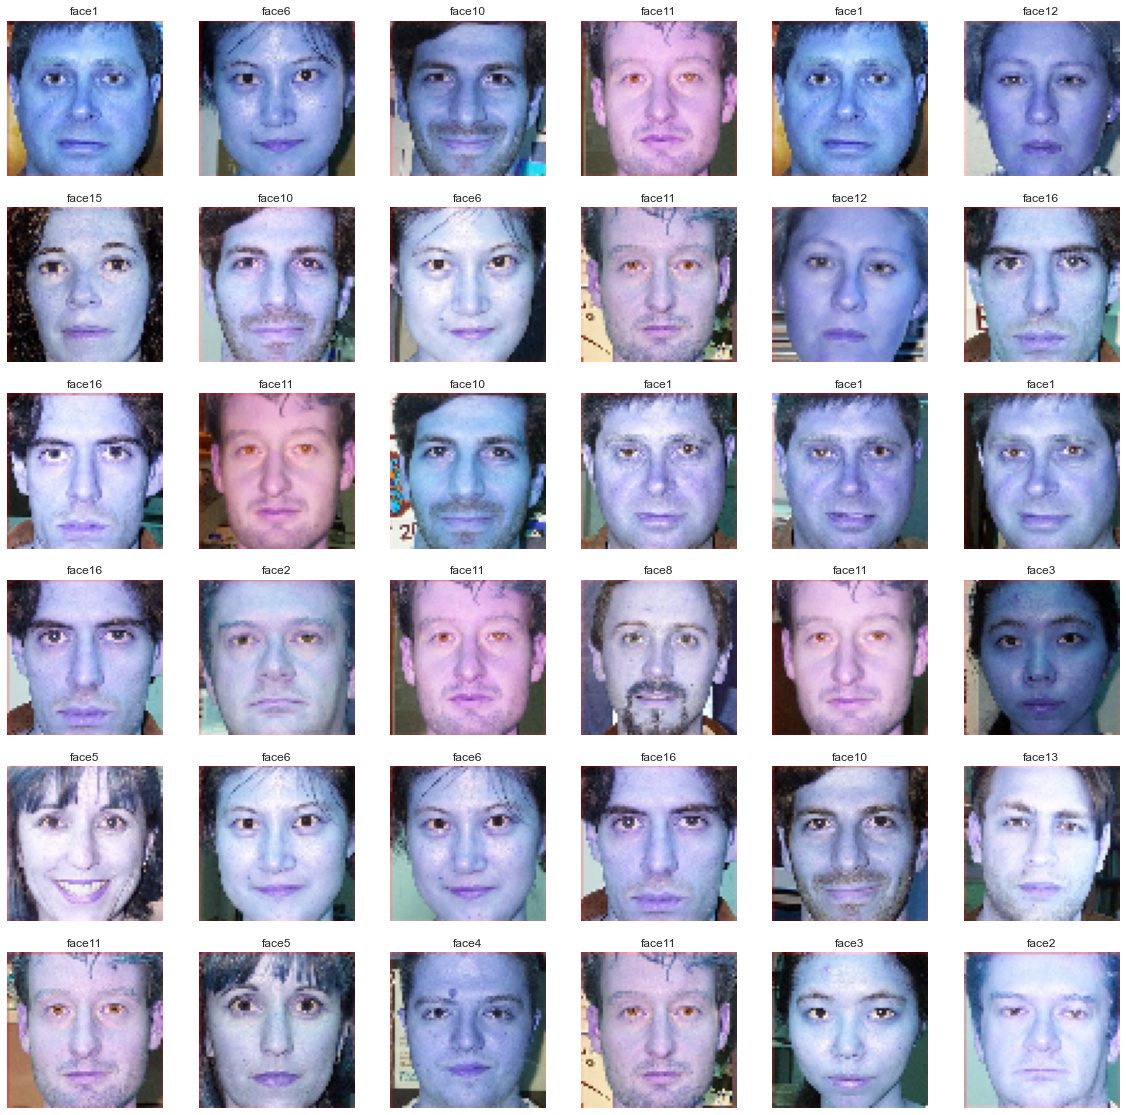

In [62]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [63]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'Final Testing Images') : 
    files = gb.glob(pathname= str(testpath + 'Final Testing Images//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [64]:
print(f'we have {len(X_test)} items in X_test')

we have 64 items in X_test


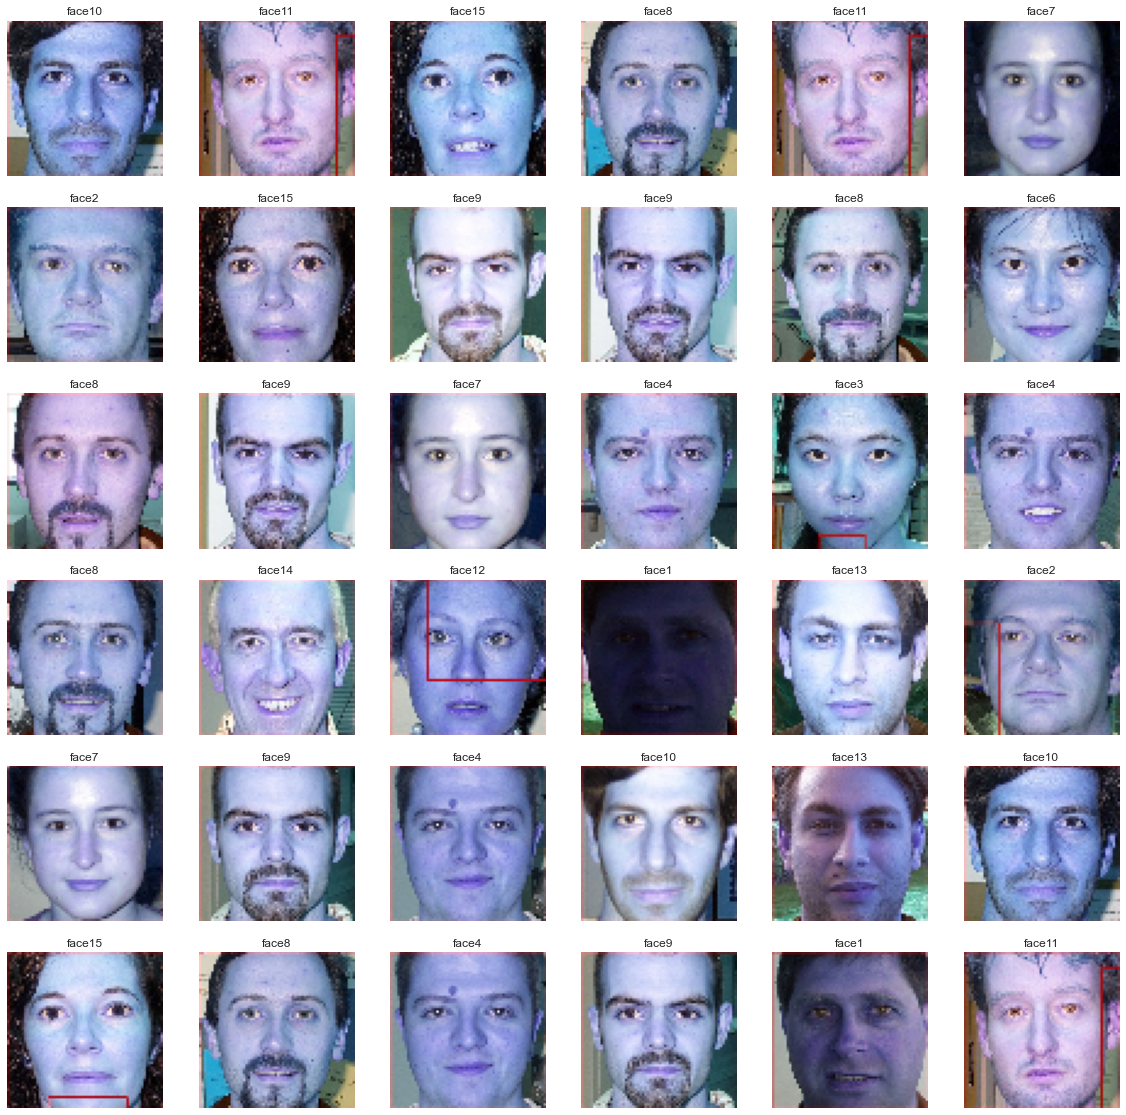

In [65]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [66]:
# TrainClasses=X_train.class_indices
# ResultMap={}
# for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
#     ResultMap[faceValue]=faceName

# # Saving the face map for future reference
# import pickle
# with open("ResultsMap.pkl", 'wb') as fileWriteStream:
#     pickle.dump(ResultMap, fileWriteStream)

# # The model will give answer as a numeric tag
# # This mapping will help to get the corresponding face name for it
# print("Mapping of Face and its ID",ResultMap)

# # The number of neurons for the output layer is equal to the number of faces
# OutputNeurons=len(ResultMap)
# print('\n The Number of output neurons: ', OutputNeurons)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (244, 64, 64, 3)
X_test shape  is (64, 64, 64, 3)
y_train shape  is (244,)
y_test shape  is (64,)


In [67]:


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# sns.set(style="whitegrid")
# import os #interact with folder 
# import glob as gb  #interact with folder
# import cv2   #press the img
# import tensorflow as tf
# import keras
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPool2D
# from keras.layers import Flatten


# from keras.layers import Dense
 
# classifier= Sequential()

# classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
 
# classifier.add(MaxPool2D(pool_size=(2,2)))
 
# classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
 
# classifier.add(MaxPool2D(pool_size=(2,2)))
 
# classifier.add(Flatten())
 
# classifier.add(Dense(64, activation='relu'))
 
# classifier.add(Dense(16, activation='softmax'))
 
# #classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
 
# import time
# # Measuring the time taken by the model to train
# StartTime=time.time()
 
# # Starting the model training
# classifier.fit(
#                     X_train,
#                     #steps_per_epoch=30,
#                     epochs=20,
#                     validation_data=y_train,
#                     validation_steps=10)
 
# EndTime=time.time()
# print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

from keras.layers import Dense

KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(s,s,3)),
#         keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(s,kernel_size=(5,5), strides=(1,1), activation='relu'),    
        keras.layers.MaxPool2D(2,2),
    
#     classifier.add(Flatten())
 
# classifier.add(Dense(64, activation='relu'))
 
# classifier.add(Dense(OutputNeurons, activation='softmax'))
    
    
        keras.layers.Flatten() , 
        keras.layers.Dense(s, activation='relu'),
        keras.layers.Dense(16,activation='softmax') ,  
#         keras.layers.MaxPool2D(4,4),
#         keras.layers.Flatten() ,    
#         keras.layers.Dense(120,activation='relu') ,    
#         keras.layers.Dense(100,activation='relu') ,    
#         keras.layers.Dense(50,activation='relu') ,        
#         keras.layers.Dropout(rate=0.5) ,            
#         keras.layers.Dense(6,activation='softmax') ,    
        ])

In [68]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 10816)             0         
                                                                 
 dense_19 (Dense)            (No

In [70]:
epochs = 10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,verbose=1, validation_steps=10)

Epoch 1/10
8/8 [==============================] - 2s 137ms/step - loss: 218.3933 - accuracy: 0.0656
Epoch 2/10
8/8 [==============================] - 1s 138ms/step - loss: 3.7607 - accuracy: 0.1270
Epoch 3/10
8/8 [==============================] - 1s 136ms/step - loss: 2.6664 - accuracy: 0.2172
Epoch 4/10
8/8 [==============================] - 1s 138ms/step - loss: 2.5082 - accuracy: 0.2746
Epoch 5/10
8/8 [==============================] - 1s 135ms/step - loss: 2.1339 - accuracy: 0.3811
Epoch 6/10
8/8 [==============================] - 1s 136ms/step - loss: 1.5309 - accuracy: 0.5861
Epoch 7/10
8/8 [==============================] - 1s 149ms/step - loss: 1.0199 - accuracy: 0.6885
Epoch 8/10
8/8 [==============================] - 1s 138ms/step - loss: 0.5102 - accuracy: 0.8730
Epoch 9/10
8/8 [==============================] - 1s 137ms/step - loss: 0.3205 - accuracy: 0.9139
Epoch 10/10
8/8 [==============================] - 1s 136ms/step - loss: 0.1989 - accuracy: 0.9508


In [71]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

2/2 [==============================] - 1s 48ms/step - loss: 0.2338 - accuracy: 0.9219
Test Loss is 0.23382450640201569
Test Accuracy is 0.921875
